In [5]:
import numpy as np
from time import time
from random import sample
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
def loadData(fileName):
    return np.loadtxt(fileName, dtype=float)

In [6]:
data = np.loadtxt("CS170_Small_Data__123.txt", dtype=float)

In [20]:
def nearestNeighbor(data,instance,features):
    restrictedData = data[:,features]
    restrictedInstance = instance[features]
    df = restrictedData[0]-restrictedInstance
    minDistance = np.dot(df,df)
    minIndex = 0
    for [index, row] in enumerate(restrictedData):
        if not np.array_equal(row, restrictedInstance):
            df = row-restrictedInstance
            distance = np.dot(df,df)
            if distance < minDistance:
                minDistance = distance
                minIndex = index
    return data[minIndex][0]



In [8]:
def leaveOneOut(data, features):
    correct = 0
    total = 0
    for row in data:
        total = total+1
        if row[0] == nearestNeighbor(data,row,features):
            correct = correct+1
    return correct/total

In [9]:
def forwardSelection(data):
    start = time()
    features = list(range(1,len(data[0])))
    usedFeatures = []
    accuracies = []
    while len(usedFeatures) < len(features):
        bestAccuracy = -1
        bestFeature = -1
        for feature in features:
            if feature not in usedFeatures:
                newFeatures = usedFeatures.copy()
                newFeatures.append(feature)
                accuracy = leaveOneOut(data,newFeatures)
                print(f"\tAccuracy using {newFeatures} was {accuracy:.2%}")
                if accuracy > bestAccuracy:
                    bestAccuracy = accuracy
                    bestFeature = feature
        usedFeatures.append(bestFeature)
        print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {bestAccuracy:.2%}")
        accuracies.append(bestAccuracy)
    print(f"Accuracies were {accuracies}")
    end = time()
    print(f"Execution took {int((end-start)*100)/100} seconds, {int((end-start)/60*100)/100} minutes, or {int((end-start)/3600*100)/100} hours")

In [10]:
def backwardSelection(data):
    start = time()
    usedFeatures = list(range(1,len(data[0])))
    print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {leaveOneOut(data,usedFeatures):.2%}")
    accuracies = []
    while len(usedFeatures) > 1:
        bestFeatures = []
        bestAccuracy = -1
        for feature in usedFeatures:
            newFeatures = usedFeatures.copy()
            newFeatures.remove(feature)
            accuracy = leaveOneOut(data,newFeatures)
            print(f"\tAccuracy using {newFeatures} was {accuracy:.2%}")
            if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestFeatures = newFeatures
        usedFeatures = bestFeatures
        print(f"Best accuracy with {len(usedFeatures)} features ({usedFeatures}) was {bestAccuracy:.2%}")
        accuracies.append(bestAccuracy)
    print(f"Accuracies were {accuracies}")
    end = time()
    print(f"Execution took {int((end-start)*100)/100} seconds, {int((end-start)/60*100)/100} minutes, or {int((end-start)/3600*100)/100} hours")

In [11]:
def randomRestartsBackwardSelection(data):
    potentialFeatures = list(range(1,len(data[0])))
    numRestarts = 10
    numStartingFeatures = 10
    overallBestAccuracy = -1
    overallBestFeatures = []
    for restart in range(10):
        featureSubset = sample(potentialFeatures,numStartingFeatures)
        print(f"Running restart {restart} of {numRestarts} with feature subset {featureSubset}")
        restartBestFeatures = []
        restartBestAccuracy = -1
        while len(featureSubset) > 1:
            bestFeatures = []
            bestAccuracy = -1
            for feature in featureSubset:
                newSubset = featureSubset.copy()
                newSubset.remove(feature)
                accuracy = leaveOneOut(data,newSubset)
                print(f"\tAccuracy using {newSubset} was {accuracy:.2%}")
                if accuracy > bestAccuracy:
                    bestAccuracy = accuracy
                    bestFeatures = newSubset
            featureSubset = bestFeatures
            print(f"Best accuracy with {len(featureSubset)} features ({featureSubset}) was {bestAccuracy:.2%}")
            if bestAccuracy > restartBestAccuracy:
                restartBestAccuracy = bestAccuracy
                restartBestFeatures = bestFeatures
        print(f"Best accuracy of restart {restart} was {restartBestAccuracy:.2%} with features {restartBestFeatures}")
        if restartBestAccuracy > overallBestAccuracy:
            overallBestAccuracy = restartBestAccuracy
            overallBestFeatures = restartBestFeatures
        
            

In [31]:
#Execution took 19.0 seconds, 0.32 minutes, or 0.01 hours
smallForwardSelectionAccuracies = [0.83, 0.976, 0.938, 0.906, 0.84, 0.812]
smallForwardSelectionNumFeatures = list(range(1,len(smallForwardSelectionAccuracies)+1))

#Execution took 18.99 seconds, 0.32 minutes, or 0.01 hours
smallBackwardSelectionAccuracies = [0.812, 0.876, 0.918, 0.936, 0.976, 0.83]
smallBackwardSelectionNumFeatures = list(range(len(smallBackwardSelectionAccuracies),0,-1))

#Execution took 2988.38 seconds, 49.81 minutes, or 0.83 hours
largeForwardSelectionAccuracies = [0.835, 0.955, 0.946, 0.926, 0.899, 0.859, 0.842, 0.828, 0.81, 0.793, 0.775, 0.778, 0.772, 0.767, 0.759, 0.754, 0.747, 0.747, 0.742, 0.733, 0.734, 0.727, 0.73, 0.732, 0.724, 0.724, 0.731, 0.726, 0.717, 0.703, 0.705, 0.703, 0.71, 0.699, 0.693, 0.692, 0.688, 0.679, 0.684, 0.665]
largeForwardSelectionNumFeatures = list(range(1,len(largeForwardSelectionAccuracies)+1))

#Execution took 3167.73 seconds, 52.80 minutes, or 0.88 hours
largeBackwardSelectionAccuracies = [0.695, 0.7, 0.707, 0.709, 0.712, 0.719, 0.717, 0.723, 0.719, 0.72, 0.728, 0.727, 0.73, 0.729, 0.733, 0.731, 0.734, 0.735, 0.734, 0.74, 0.743, 0.737, 0.74, 0.739, 0.732, 0.738, 0.73, 0.728, 0.729, 0.724, 0.726, 0.724, 0.72, 0.715, 0.72, 0.741, 0.711, 0.713, 0.692]
largeBackwardSelectionNumFeatures = list(range(len(largeBackwardSelectionAccuracies),0,-1))

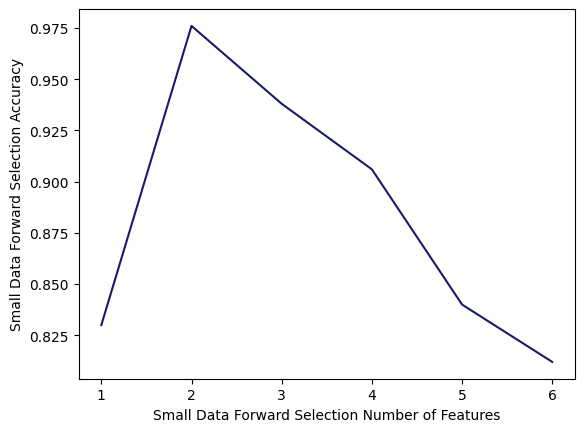

In [32]:
plt.clf()
plt.cla()
plt.plot(smallForwardSelectionNumFeatures, smallForwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Small Data Forward Selection Number of Features")
plt.ylabel("Small Data Forward Selection Accuracy")
plt.savefig("SmallDataForwardSelection.png")
plt.show()

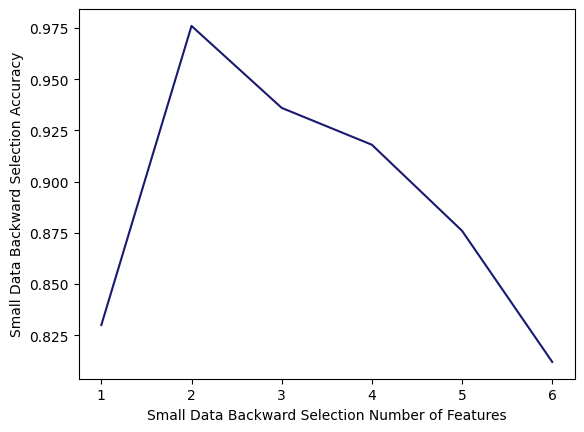

In [33]:
plt.clf()
plt.cla()
plt.plot(smallBackwardSelectionNumFeatures, smallBackwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Small Data Backward Selection Number of Features")
plt.ylabel("Small Data Backward Selection Accuracy")
plt.savefig("SmallDataBackwardSelection.png")
plt.show()

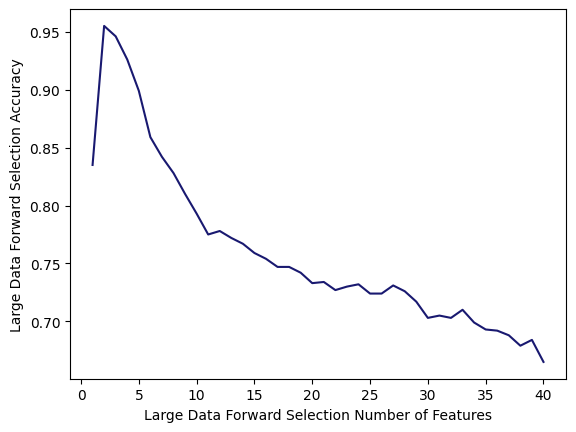

In [34]:
plt.clf()
plt.cla()
plt.plot(largeForwardSelectionNumFeatures,largeForwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Large Data Forward Selection Number of Features")
plt.ylabel("Large Data Forward Selection Accuracy")
plt.savefig("LargeDataForwardSelection.png")
plt.show()

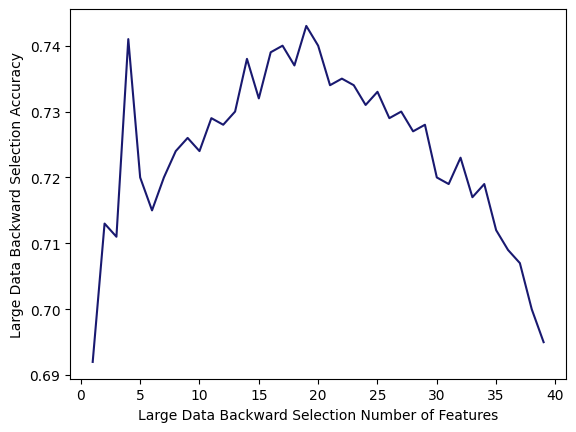

In [36]:
plt.clf()
plt.cla()
plt.plot(largeBackwardSelectionNumFeatures,largeBackwardSelectionAccuracies, color = "midnightblue")
plt.xlabel("Large Data Backward Selection Number of Features")
plt.ylabel("Large Data Backward Selection Accuracy")
plt.savefig("LargeDataBackwardSelection.png")
plt.show()

In [41]:
maxAccuracy = max(largeBackwardSelectionAccuracies)
print(maxAccuracy)
largeBackwardSelectionAccuracies.index(maxAccuracy)

0.743


20